<a href="https://colab.research.google.com/github/aamaash/Abdulwadoud_Maash_HW1/blob/main/Abdulwadoud_Maash_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Abdulwadoud Maash**

**Github: aamaash**

**USC ID: 6952 6495 53**

## **Programming Part: Vertebral Column Data Set**

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.1


# (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
headers = ['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','classes']
#load the data
dt1 = pd.read_csv('column_2C.dat', sep = '\s+', skiprows = 1)
dt1.set_axis(headers,axis=1,inplace=True)
#print(dt1.shape)
dt1.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classes
0,68.83,22.22,50.09,46.61,105.99,-3.53,AB
1,69.30,24.65,44.31,44.64,101.87,11.21,AB
2,49.71,9.65,28.32,40.06,108.17,7.92,AB
3,40.25,13.92,25.12,26.33,130.33,2.23,AB
4,53.43,15.86,37.17,37.57,120.57,5.99,AB


In [49]:
#filtering the unused classes

dt1 = dt1.replace('AB', '1') # dataset has Abnormal 'AB' in it, convert these into 1
dt1 = dt1.replace('NO', '0') # dataset has Normal 'NO' in it, convert these into 0

dt1[dt1['classes']=='1'].describe()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,64.823365,19.824567,56.152212,44.999231,115.159471,38.120096
std,17.656408,10.542865,19.612610,14.539572,14.112558,40.740549
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-10.680000
25%,50.175000,13.062500,41.830000,34.380000,107.562500,7.942500
50%,65.605000,18.795000,56.395000,44.820000,115.800000,32.315000
75%,77.667500,24.837500,68.265000,55.157500,123.197500,55.570000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [ ]:
dt1[dt1['classes']=='0'].describe()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,100.0000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,51.6856,12.821800,43.542300,38.863800,123.891200,2.18700
std,12.3679,6.778658,12.361581,9.623776,9.013755,6.30702
min,30.7400,-5.850000,19.070000,17.390000,100.500000,-11.06000
25%,42.8200,8.802500,35.000000,32.342500,118.180000,-1.51000
50%,50.1250,13.485000,42.640000,37.060000,123.875000,1.15500
75%,61.4725,16.787500,51.602500,44.605000,129.040000,4.96750
max,89.8300,29.890000,90.560000,67.200000,147.890000,31.17000


In [5]:
#save data into a numby array
dt1.iloc[:,0:6].head(10)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,68.83,22.22,50.09,46.61,105.99,-3.53
1,69.30,24.65,44.31,44.64,101.87,11.21
2,49.71,9.65,28.32,40.06,108.17,7.92
3,40.25,13.92,25.12,26.33,130.33,2.23
4,53.43,15.86,37.17,37.57,120.57,5.99
5,45.37,10.76,29.04,34.61,117.27,-10.68
6,43.79,13.53,42.69,30.26,125.00,13.29
7,36.69,5.01,41.95,31.68,84.24,0.66
8,49.71,13.04,31.33,36.67,108.65,-7.83
9,31.23,17.72,15.50,13.52,120.06,0.50


ref:
How to add headers 
https://www.stackvidhya.com/how-to-add-header-to-pandas-dataframe/#:~:text=You%20can%20add%20header%20to,%2C%20%27column_Name_2%27%5D%20method.&text=You%20can%20use%20the%20below,column%20headers%20to%20the%20dataframe.

how to read dat file
https://stackoverflow.com/questions/41025416/read-data-dat-file-with-pandas

replace values in dataframe
https://mclguide.readthedocs.io/en/latest/sklearn/preprocessing.html



---



# (b) Pre-Processing and Exploratory data analysis:

> i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.



In [6]:
# preprocess the data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#binarizer = Binarizer().fit(dt1.iloc[:,0:6]) #binarize the features without the classes
#bin_trans = binarizer.transform(dt1.iloc[:,0:6])

In [7]:
def corrfunc(x, y, ax=None, hue = None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

ref: the corrolation function
https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python

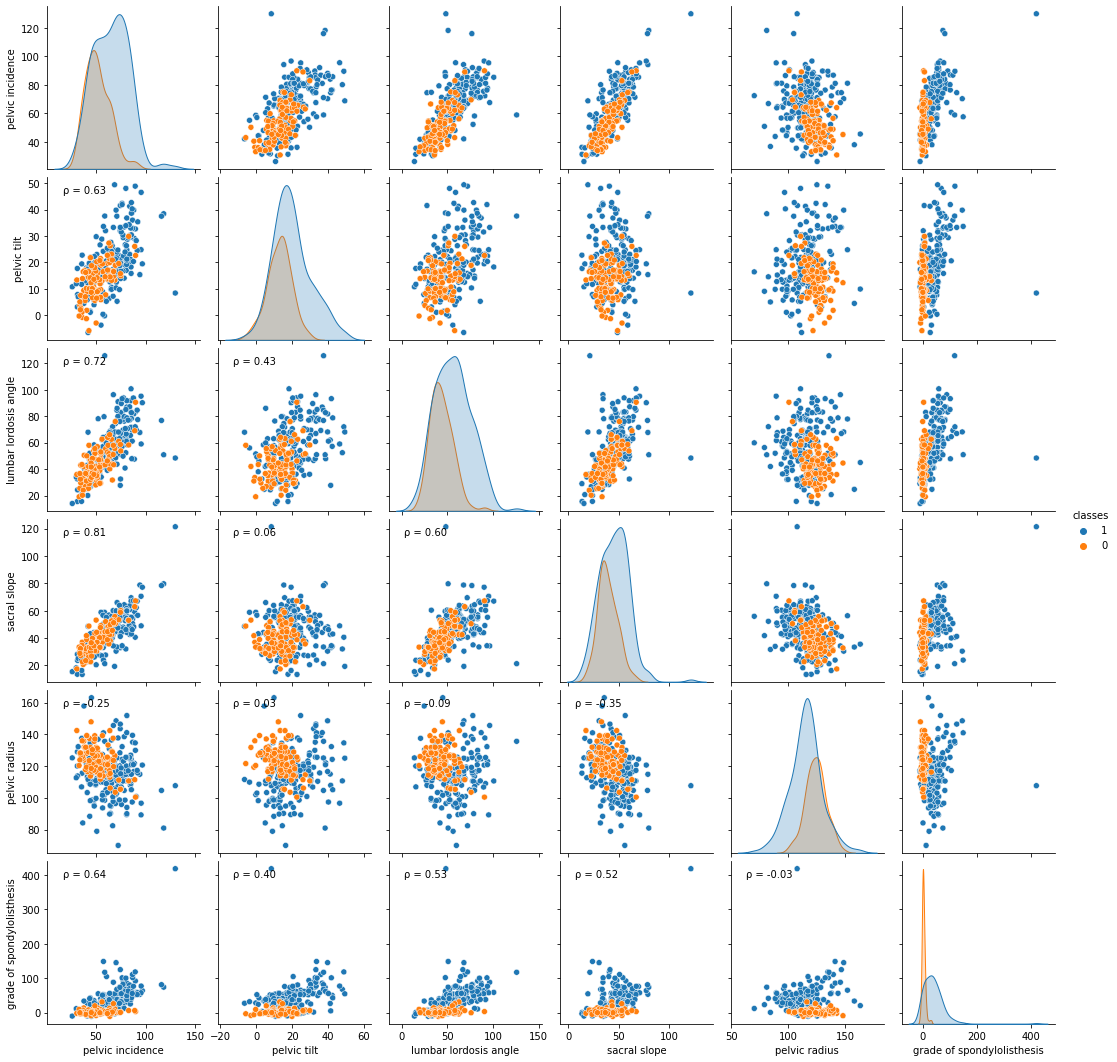

In [8]:
#scatterplot the data
#df_trans = pd.DataFrame(bin_trans)
g = sns.pairplot(dt1, hue = 'classes')
g.map_lower(corrfunc)
plt.show()



> ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).


In [ ]:
headers

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'classes']

In [ ]:
i, j = divmod(6, 3)
print(i)
print(j)

2
0


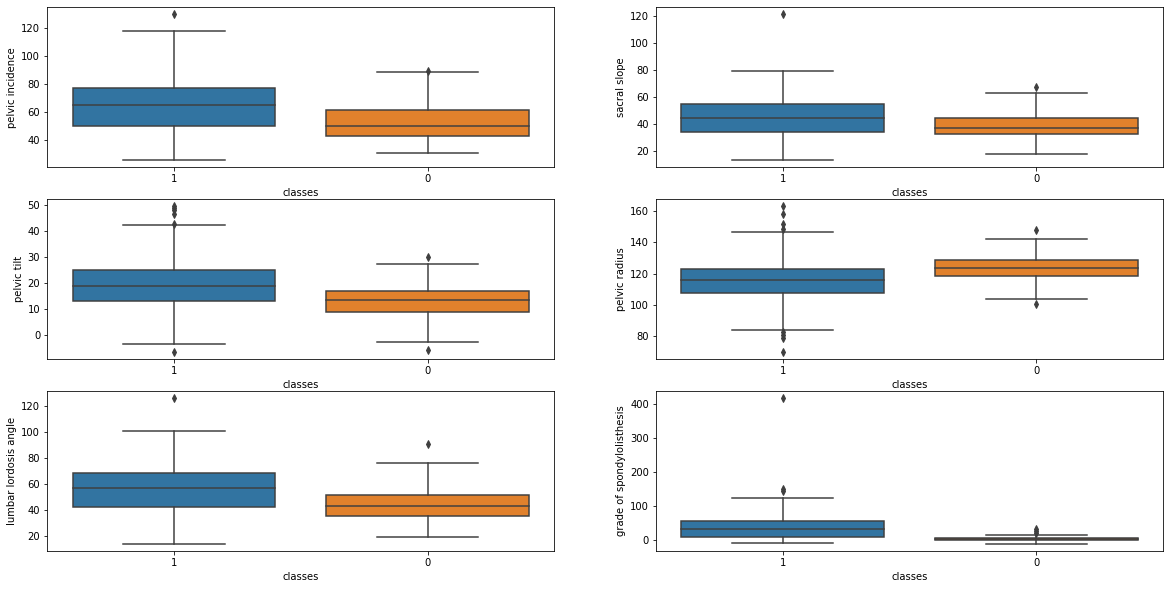

In [ ]:
fig, axs = plt.subplots(3,2, figsize = (20,10))

for i, name in enumerate(headers[:6]):
  c, r = divmod(i, 3)
  sns.boxplot(y= name, x= 'classes', data=dt1, orient = 'v', ax = axs[r,c]) #boxplt an indep var with both classes  

plt.show()

Ref: 
i had a problem with subplot boxplot
https://stackoverflow.com/questions/61526812/boxplot-for-all-data-in-dataframe-error-numpy-ndarray-object-has-no-attribut

Ref:
https://stackabuse.com/seaborn-box-plot-tutorial-and-examples/



> iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.



In [9]:
print('class 0 size ={}\nclass 1 = {}'.format(dt1[dt1['classes']=='0'].shape,
                                              dt1[dt1['classes']=='1'].shape))
len(dt1[dt1['classes']=='1'])

class 0 size =(100, 7)
class 1 = (208, 7)


208

In [50]:
from sklearn.model_selection import train_test_split
train_data_0,test_data_0 = train_test_split(dt1[dt1['classes']=='0'],
                                      train_size = 0.7, 
                                      random_state=42)
train_data_1,test_data_1 = train_test_split(dt1[dt1['classes']=='1'],
                                      train_size = 140/len(dt1[dt1['classes']=='1']), 
                                      random_state=42)

print('class 0\n train_data size ={}\ntest_data size= {}'.format(train_data_0.shape,
                                              test_data_0.shape))
print('__________________________________')
print('class 1\n train_data size ={}\ntest_data size= {}'.format(train_data_1.shape,
                                              test_data_1.shape))

class 0
 train_data size =(70, 7)
test_data size= (30, 7)
__________________________________
class 1
 train_data size =(140, 7)
test_data size= (68, 7)


In [51]:
from sklearn.utils import shuffle
#joining both training dataset in one matrix
train_data = pd.concat([train_data_1, train_data_0])
train_data = shuffle(train_data, random_state = 42, )
#joining both test dataset in one matrix
test_data = pd.concat([test_data_1, test_data_0])
test_data = shuffle(test_data, random_state = 42)
print('X_train size ={}\nX_test size = {}'.format(train_data.shape,
                                              test_data.shape))
train_data.head(20)

X_train size =(210, 7)
X_test size = (98, 7)


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classes
137,85.10,21.07,91.73,64.03,109.06,38.03,1
262,54.50,6.82,47.00,47.68,111.79,-4.41,0
7,36.69,5.01,41.95,31.68,84.24,0.66,1
295,45.58,18.76,33.77,26.82,116.80,3.13,0
136,72.05,24.70,79.87,47.35,107.17,56.43,1
227,43.44,10.10,36.03,33.34,137.44,-3.11,0
119,83.88,23.08,87.14,60.80,124.65,80.56,1
266,57.15,16.49,42.84,40.66,113.81,5.02,0
76,67.41,17.44,60.14,49.97,111.12,33.16,1
229,53.91,12.94,39.00,40.97,118.19,5.07,0


In [20]:
train_data

array([[ 1.44238541,  0.36107953,  2.17755765, ..., -0.68318197,
         0.53673261,  0.70710678],
       [-0.396324  , -1.1321909 , -0.29767451, ..., -0.47568442,
        -0.99286625, -1.41421356],
       [-1.46650095, -1.32186245, -0.57712728, ..., -2.56966153,
        -0.81013613,  0.70710678],
       ...,
       [-1.00802536, -0.53278691, -0.9008498 , ...,  0.46147484,
        -0.63857886,  0.70710678],
       [ 0.02129137,  0.5308408 , -0.34360437, ...,  0.5792848 ,
        -0.93159579, -1.41421356],
       [ 1.37208182,  2.47995167,  0.53238322, ..., -0.23094372,
         0.12441849,  0.70710678]])

In [52]:
#now seperate the features from the labels and convert it into numpy
X_train = train_data.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values
y_train = train_data.iloc[:, 6].values
y_test = test_data.iloc[:, 6].values

In [53]:
#Preprocess the training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Ref:https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm



---



# (c) Classification using KNN on Vertebral Column Data Set



> i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).




In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

ref: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm



> ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for
k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.2



In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
scores = [] #store all errors
for k in range(208,0,-3):
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.7551020408163265, 0.7653061224489796, 0.7755102040816326, 0.7755102040816326, 0.7653061224489796, 0.7551020408163265, 0.7755102040816326, 0.7448979591836735, 0.7448979591836735, 0.7346938775510204, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7448979591836735, 0.7448979591836735, 0.7653061224489796, 0.7755102040816326, 0.7653061224489796, 0.7959183673469388, 0.7857142857142857, 0.8061224489795918, 0.8163265306122449, 0.8163265306122449,

Text(0, 0.5, 'Testing Accuracy')

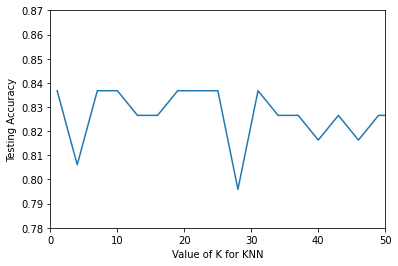

In [44]:
plt.plot(range(208,0,-3), scores)
plt.axis([0, 50, 0.78, 0.87])
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [45]:
#choose k at 7 as it has higher accuracy using Euclidean distance
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test) #the estimated output

In [46]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print('________________________________')

#calc the True -ve, False -ve, True +ve, False +ve
TN = result[0][0]
FN = result[1][0]
TP = result[1][1]
FP = result[0][1]

TPR = TP/(TP+FN) #True Positive Rate
FPR = FP/(FP+TN) #False Positive Rate
print("True Positive Rate: {}\nFalse Positive Rate: {}".format(TPR,FPR))
print('________________________________')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('________________________________')
result2 = accuracy_score(y_test,y_pred) # we can find as following (TP+TN)/(TP+FP+FN+TN) instead of the function
print("Accuracy:",result2)

Confusion Matrix:
[[22  8]
 [ 8 60]]
________________________________
True Positive Rate: 0.8823529411764706
False Positive Rate: 0.26666666666666666
________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.88      0.88      0.88        68

    accuracy                           0.84        98
   macro avg       0.81      0.81      0.81        98
weighted avg       0.84      0.84      0.84        98

________________________________
Accuracy: 0.8367346938775511




> iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,
 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the first bN/3c rows of Class 0 and the first N − bN/3c rows of Class 1 in the training set you created in 7(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

Let us further explore some variants of KNN.

training data size: 20
the optimal k: 6
score: 0.7857142857142857
_______________________________
training data size: 30
the optimal k: 6
score: 0.8061224489795918
_______________________________
training data size: 40
the optimal k: 6
score: 0.8571428571428571
_______________________________
training data size: 50
the optimal k: 6
score: 0.8163265306122449
_______________________________
training data size: 60
the optimal k: 16
score: 0.8163265306122449
_______________________________
training data size: 70
the optimal k: 6
score: 0.8367346938775511
_______________________________
training data size: 80
the optimal k: 6
score: 0.8469387755102041
_______________________________
training data size: 90
the optimal k: 16
score: 0.826530612244898
_______________________________
training data size: 100
the optimal k: 11
score: 0.8367346938775511
_______________________________
training data size: 110
the optimal k: 11
score: 0.8469387755102041
_______________________________
training data s

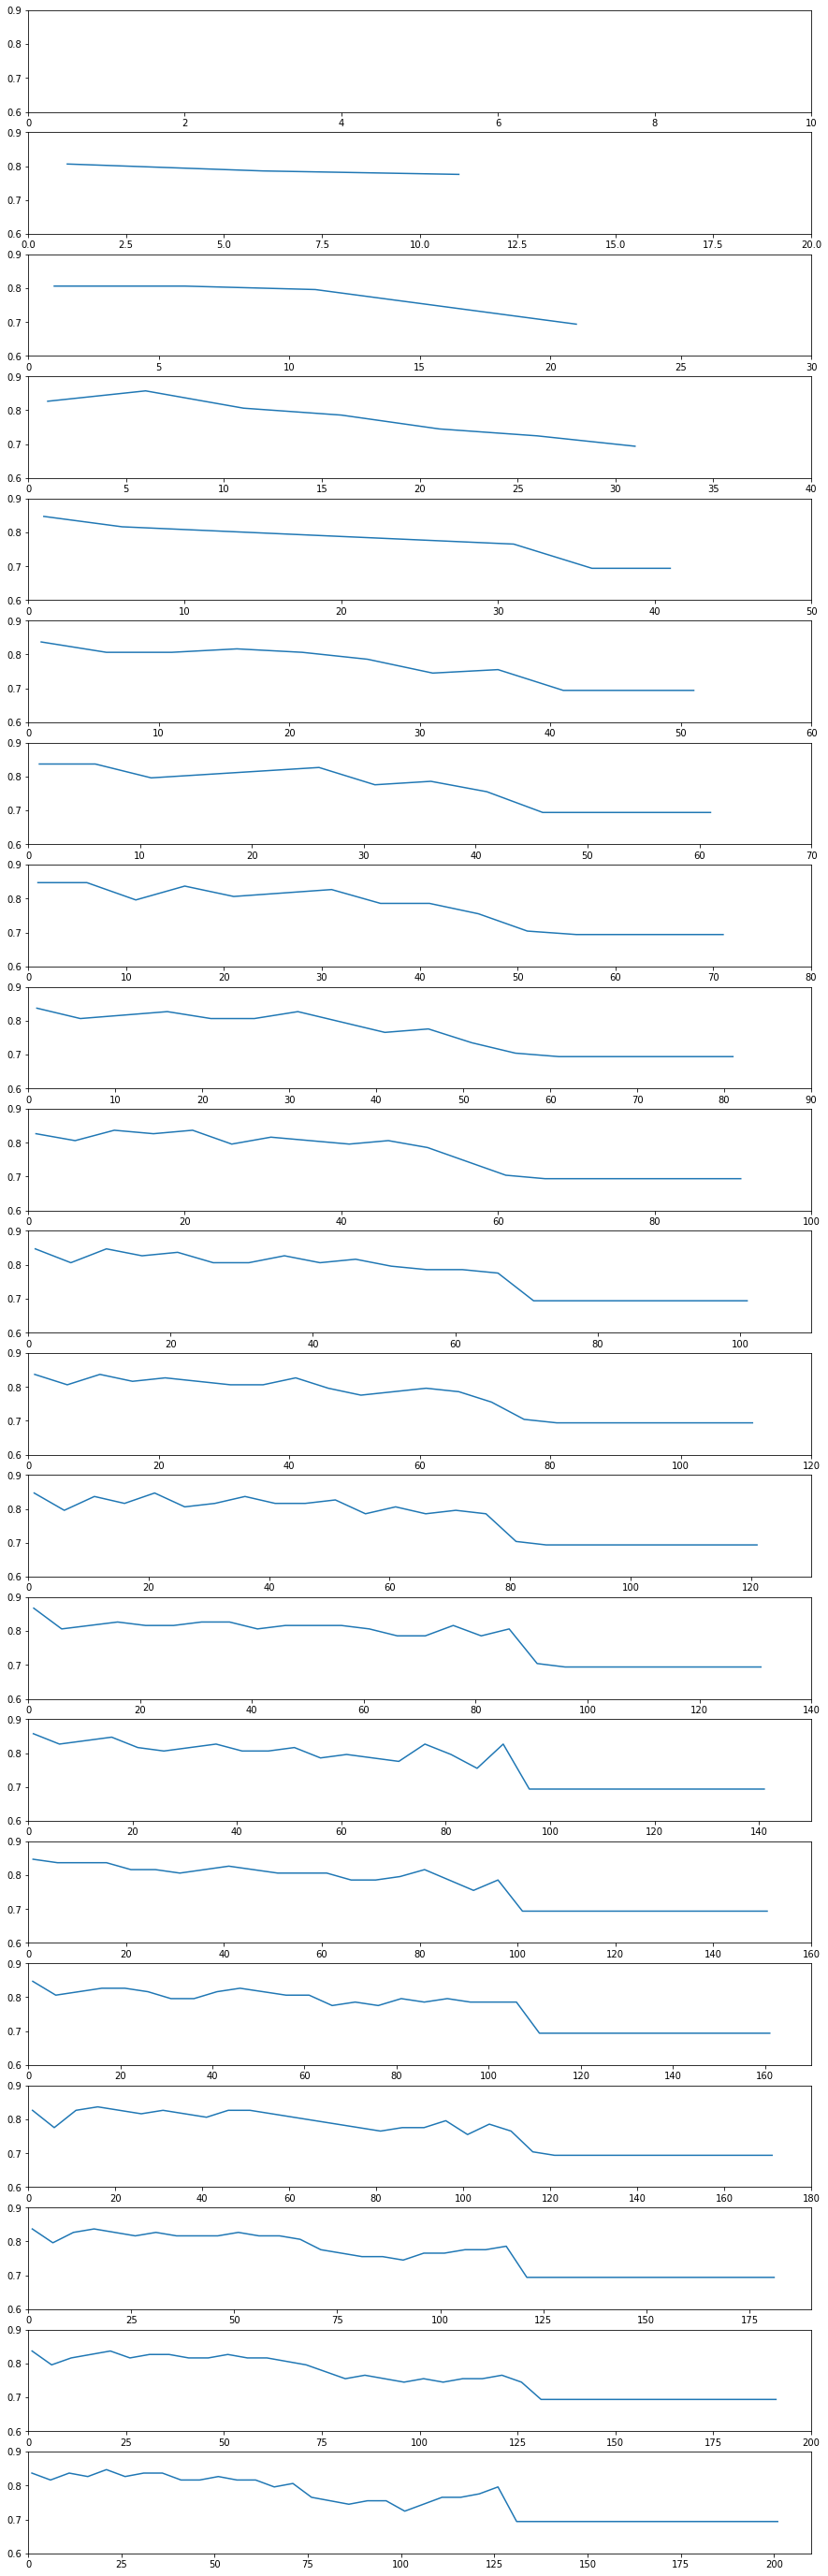

In [ ]:
# resizing the training set
N_train = range(10,211,10)
k_range = range(196,0,-5)

fig,axs = plt.subplots(len(N_train),1,figsize=(15,50))

for i, N in enumerate(N_train):
  #set the interval and store it
  train_data_0_mod = train_data_0[:round(N/3)][:]
  train_data_1_mod = train_data_1[:round(2*N/3)][:]
  #joining both training dataset in one matrix
  train_data = pd.concat([train_data_1_mod, train_data_0_mod])
  train_data = shuffle(train_data, random_state = 42, )
  #seperate the features and labels
  X_train = train_data.iloc[:, :-1].values  
  y_train = train_data.iloc[:, 6].values
  ##preprocess the data. Note: I should have preprocessed the data first so I can avoid some extra steps
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)  
  #KNN classifier
  scores = []  
  max_score = -1
  opt_k
  for k in range(1,N-4,5):
    #print(k)
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    #find the optimal k 
    if k!=1:
      if score > max_score:
        max_score = score
        opt_k = k

  if scores[1:] != []: # avoid an empty set  
    print("training data size: {}\nthe optimal k: {}\nscore: {}".format(N,opt_k,max(scores[1:])))
    print('_______________________________')
  
  #if scores[2:] != []:
  #  max_score = max(scores[2:])
  #  opt_k = 1+scores.index(max_score)*5 # k from (1, N-4)
  #  print("training data size: {}\nthe optimal k: {}".format(N,opt_k))

  #plot the scores
  axs[i].plot(range(1,N-4,5), scores)
  axs[i].axis([0, N, 0.6, 0.9])
  
plt.show()



---



# (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}. 



> i. Minkowski Distance:
>> A. which becomes Manhattan Distance with p = 1

>> B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found for the Manhattan distance in 7(d)iA. What is the best log10(p)?

>> C. which becomes Chebyshev Distance with p → ∞


In [ ]:
#A>>
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=1) #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Manhattan Distance Metric")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Manhattan Distance Metric
the optimal k: 16
score: 0.8367346938775511


In [ ]:
#B>>
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=16) #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
 
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Minkowski Distance Metric with log10(p)")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Minkowski Distance Metric with log10(p)
the optimal k: 11
score: 0.8673469387755102


In [ ]:
#C>>
from math import inf
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=inf) #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
    
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Chebyshev Distance Metric")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Chebyshev Distance Metric
the optimal k: 11
score: 0.8673469387755102


> ii. Mahalanobis Distance

In [ ]:
#from sklearn.neighbors import NearestNeighbors
#the covariance of X_train matrix
X_train_cov = np.cov(X_train, rowvar=False)
scores = [] #store all errors
max_score = -1
opt_k=0

for k in range(1,196,5):
  #classifier mahalanobis
  classifier = KNeighborsClassifier(n_neighbors = k, algorithm='auto', metric='mahalanobis',
              metric_params={'VI': X_train_cov})
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Mahalanobis Distance Metric")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Mahalanobis Distance Metric
the optimal k: 11
score: 0.826530612244898


Ref:
https://github.com/yzhao062/pyod/blob/master/examples/knn_mahalanobis_example.py

https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347#34650347



---



# (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [ ]:
#Euclidean
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance') #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Manhattan Distance Metric")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Manhattan Distance Metric
the optimal k: 21
score: 0.8775510204081632


In [ ]:
#Manhattan
#A>>
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=1, weights = 'distance') #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Manhattan Distance Metric")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Manhattan Distance Metric
the optimal k: 146
score: 0.8571428571428571


In [ ]:
#Chebyshev
#C>>
from math import inf
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=inf, weights = 'distance') #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
    
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k 
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("Chebyshev Distance Metric")
print("the optimal k: {}\nscore: {}".format(opt_k,max(scores[1:])))

Chebyshev Distance Metric
the optimal k: 16
score: 0.8571428571428571




---



# (f) What is the lowest training error rate you achieved in this homework?
I used accuracy in my code, so I suppose the highest accuracy is the best model, which is **the Euclidean with weighted voting KNN model**



---



---

